# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities in this dataset")

There are 580 cities in this dataset


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating the Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
endpoint = f"{url}appid={weather_api_key}&units={units}&q="
        

In [4]:
#set up list to save the info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Processing")
print("--------------------------------------------")
count = 0
num = 1
for idx, city in enumerate(cities):
    count = count + 1
    num = num + 1
    
    print(f"Processing Record {count} of {len(cities)} | {city}")
    try:
        response = requests.get(endpoint + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Processing
--------------------------------------------
Processing Record 1 of 580 | east london
Processing Record 2 of 580 | malpe
Processing Record 3 of 580 | hofn
Processing Record 4 of 580 | sulangan
Processing Record 5 of 580 | butaritari
Processing Record 6 of 580 | kelvington
Processing Record 7 of 580 | ambulu
Processing Record 8 of 580 | cape town
Processing Record 9 of 580 | naryan-mar
Processing Record 10 of 580 | nome
Processing Record 11 of 580 | kaeo
Processing Record 12 of 580 | saint george
Processing Record 13 of 580 | tuktoyaktuk
Processing Record 14 of 580 | ponta delgada
Processing Record 15 of 580 | berlevag
Processing Record 16 of 580 | morki
Processing Record 17 of 580 | castro
Processing Record 18 of 580 | manzhouli
Processing Record 19 of 580 | kant
Processing Record 20 of 580 | tiksi
Processing Record 21 of 580 | road town
Processing Record 22 of 580 | albany
Processing Record 23 of 580 | new norfolk
Processing Record 24 of 580 | ancud
Processin

Processing Record 192 of 580 | klaksvik
Processing Record 193 of 580 | grand gaube
Processing Record 194 of 580 | ferkessedougou
Processing Record 195 of 580 | haines junction
Processing Record 196 of 580 | tulum
Processing Record 197 of 580 | mocuba
Processing Record 198 of 580 | abaza
Processing Record 199 of 580 | acapulco
Processing Record 200 of 580 | saint-philippe
Processing Record 201 of 580 | necochea
Processing Record 202 of 580 | waw
Processing Record 203 of 580 | nyurba
Processing Record 204 of 580 | nicoya
Processing Record 205 of 580 | hirara
Processing Record 206 of 580 | clyde river
Processing Record 207 of 580 | guerrero negro
Processing Record 208 of 580 | illoqqortoormiut
City not found. Skipping...
Processing Record 209 of 580 | grimma
Processing Record 210 of 580 | peleduy
Processing Record 211 of 580 | goderich
Processing Record 212 of 580 | mount isa
Processing Record 213 of 580 | biak
Processing Record 214 of 580 | srostki
Processing Record 215 of 580 | sao fili

Processing Record 387 of 580 | oistins
Processing Record 388 of 580 | sobolevo
Processing Record 389 of 580 | abrau-dyurso
Processing Record 390 of 580 | bintulu
Processing Record 391 of 580 | bukachacha
Processing Record 392 of 580 | pervomayskiy
Processing Record 393 of 580 | pizarro
Processing Record 394 of 580 | bathsheba
Processing Record 395 of 580 | omsukchan
Processing Record 396 of 580 | minot
Processing Record 397 of 580 | beyneu
Processing Record 398 of 580 | lolua
City not found. Skipping...
Processing Record 399 of 580 | puerto el triunfo
Processing Record 400 of 580 | valley city
Processing Record 401 of 580 | panchagarh
Processing Record 402 of 580 | margate
Processing Record 403 of 580 | levelland
Processing Record 404 of 580 | kahului
Processing Record 405 of 580 | palmer
Processing Record 406 of 580 | wajima
Processing Record 407 of 580 | sterling
Processing Record 408 of 580 | camacha
Processing Record 409 of 580 | roald
Processing Record 410 of 580 | eirunepe
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped.
city_weather_df = city_weather_df.dropna(how="any")


In [6]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.02,27.91,67.08,87.0,99.0,21.32,ZA,1.603755e+09
1,malpe,13.35,74.72,77.00,88.0,20.0,2.80,IN,1.603755e+09
2,hofn,64.25,-15.21,36.54,78.0,4.0,10.74,IS,1.603755e+09
3,sulangan,11.14,123.72,82.63,75.0,100.0,10.22,PH,1.603755e+09
4,butaritari,3.07,172.79,81.72,67.0,77.0,9.82,KI,1.603755e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

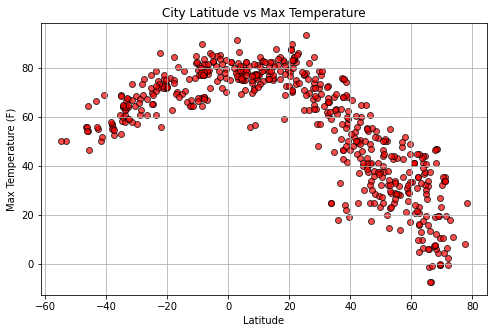

In [7]:
# Create a scatter plot for latitude vs max temperature.
scatlat = weather_df["Lat"]
scattemp = weather_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(scatlat, scattemp,alpha = 0.70,color="red",edgecolors = "k")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png")
plt.show()

##### This plot shows that near the latitude 0, or the equater, the temperature is higher than the ones in the south or in the north.

#### Latitude vs. Humidity Plot

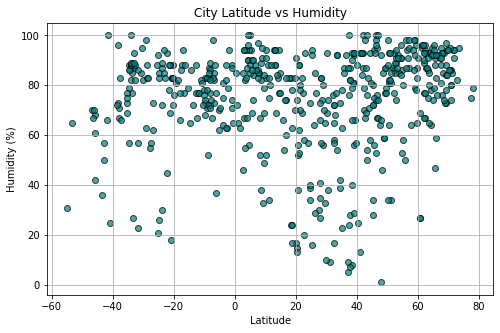

In [8]:
# Create a scatter plot for latitude vs humidity.
scatlat = weather_df["Lat"]
scathum = weather_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(scatlat, scathum,alpha = 0.70, color= "teal",edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png")
plt.show()


##### Here we can se the relation between latitude and humidity, and for the result, there's no actual relation with those two variables, 

#### Latitude vs. Cloudiness Plot

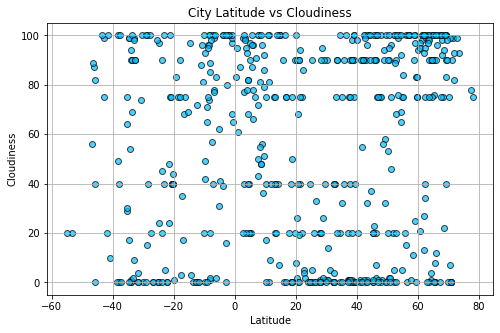

In [9]:
# Create a scatter plot for latitude vs Cloudiness.
scatlat = weather_df["Lat"]
scatcloud = weather_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(scatlat, scatcloud,alpha = 0.70, color= "deepskyblue",edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png")
plt.show()


##### This plot shows the relation between latitude and cloudiness, and for the result, the clouds are distributed in the same way in cities of the nort, and in cities of the south.

#### Latitude vs. Wind Speed Plot

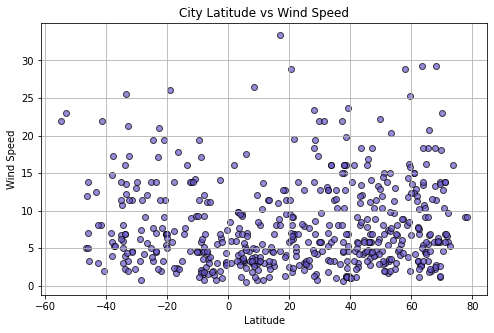

In [10]:
# Create a scatter plot for latitude vs Wind Speed.
scatlat = weather_df["Lat"]
scatwind = weather_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.scatter(scatlat, scatwind,alpha = 0.70, color= "slateblue",edgecolors = "k", linewidths = 1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("./output_data/latitude_vs_windspeed.png")
plt.show()

##### This plot shows the relation between latitude and wind speed, and we can conclude that the wind exist in the same way and intensity across all cities of the north and the south.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinearRegression(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(8,5))
    plt.scatter(x_values, y_values,alpha = 0.70, edgecolors = "k")
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,xy=(10, 50),fontsize=15,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=15,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=15,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7569468181800674
The correlation between both factors is -0.87


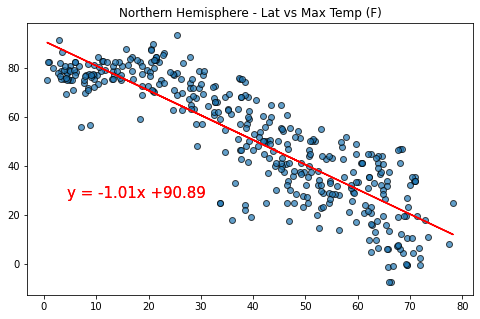

In [13]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
LinearRegression(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png")
plt.show()

##### The high r value indicates a strong negative correlation between latitude and tempearture in the North Hemispehere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6224747344724535
The correlation between both factors is 0.79


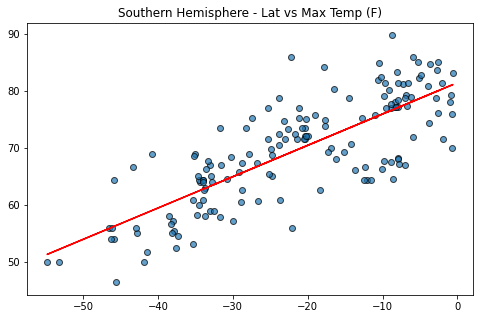

In [16]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']
LinearRegression(x_values, y_values, "Lat", "Max Temp (F)", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

##### The high r value indicates a strong correlation between latitude and tempearture in the North Hemispehere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03628961692716456
The correlation between both factors is 0.19


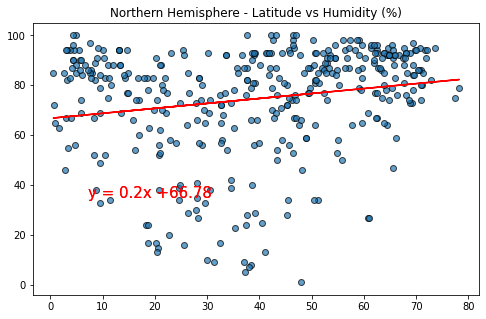

In [17]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
LinearRegression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

##### There's a poor correlation between latitude and Humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03628961692716456
The correlation between both factors is 0.19


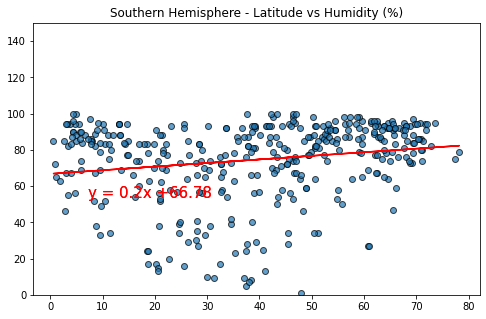

In [18]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
LinearRegression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

##### There's a poor correlation between latitude and Humidity in the Southern  Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01133028243655287
The correlation between both factors is nan


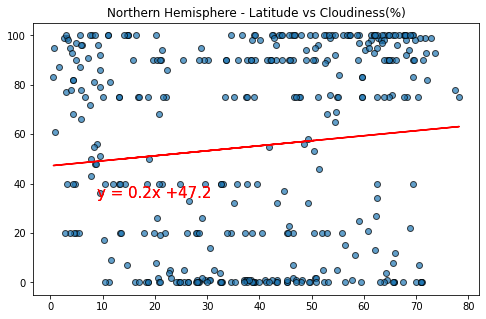

In [19]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
LinearRegression(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

##### There's null correlation between latitude and cloudiness in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023391901367000003
The correlation between both factors is 0.15


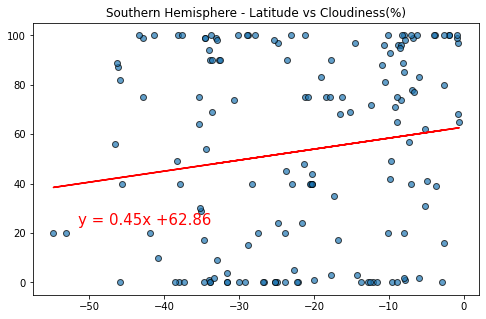

In [20]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
LinearRegression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

##### There's null correlation between latitude and cloudiness in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023847078009348308
The correlation between both factors is 0.15


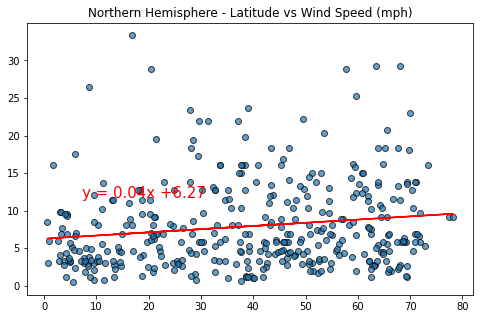

In [21]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
LinearRegression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

##### There's null correlation between latitude and wind speed in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08232715891497687
The correlation between both factors is -0.29


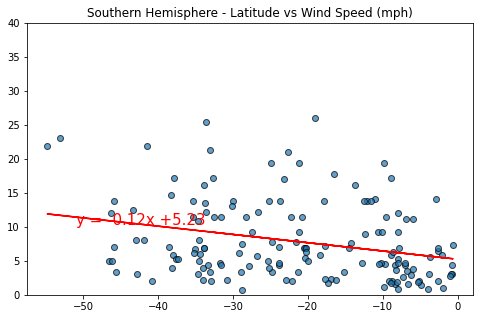

In [22]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
LinearRegression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()


##### There's null correlation between latitude and wind speed in the Southern Hemisphere